## Hypothesis 

Over the years 2017 through 2024, the number of
ICML publications authored by industry-affiliated
researchers has steadily increased, and by 2024, it
has reached approximately one-fourth the number
of publications authored by academia-affiliated re-
searchers.

## Pre-processing

In [101]:
import pandas as pd

import openai
import time


import json
from tqdm import tqdm
%config InlineBackend.figure_format = 'retina'


In [21]:
icml_iclr_neurips = pd.read_csv("../papers.csv")
icml = icml_iclr_neurips[icml_iclr_neurips["Conference"] == "ICML"]
icml = icml.reset_index(drop=True)
icml

,Conference,Year,Title,Author,Affiliation
0,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Max Jaderberg,DeepMind
1,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Wojciech Czarnecki,DeepMind
2,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Simon Osindero,DeepMind
3,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Oriol Vinyals,DeepMind
4,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Alex Graves,DeepMind
...,...,...,...,...,...
42660,ICML,2024,Irregular Multivariate Time Series Forecasting...,Weijia Zhang,The Hong Kong University of Science and Techno...
42661,ICML,2024,Irregular Multivariate Time Series Forecasting...,Chenlong Yin,The Hong Kong University of Science and Techno...
42662,ICML,2024,Irregular Multivariate Time Series Forecasting...,Hao Liu,The Hong Kong University of Science and Techno...
42663,ICML,2024,Irregular Multivariate Time Series Forecasting...,Xiaofang Zhou,The Hong Kong University of Science and Techno...


In [30]:
len(icml["Affiliation"].unique()) #unique number of affiliations
# icml["Affiliation"].value_counts().to_csv("affiliation_counts.csv", header=True)

5008

### Filtering to make annotation easier 

let us take 85% of the dataset, with authors from affiliations that have more than 3 publications only. This approximation will help us preserve information and keep annotation simpler.

In [43]:
affiliation_paper_counts = icml["Affiliation"].value_counts()

#Filter affiliations with more than 3 papers
affiliations_with_more_than_3_papers = affiliation_paper_counts[affiliation_paper_counts > 3]

num_affiliations = len(affiliations_with_more_than_3_papers)

print(f"Number of affiliations with more than 3 papers: {num_affiliations}")

rows_used = affiliations_with_more_than_3_papers.sum()

percentage_used = (rows_used / len(icml)) * 100

print(f"Total rows used: {rows_used}")
print(f"Percentage of total rows used: {percentage_used:.2f}%")

Number of affiliations with more than 3 papers: 1210
Total rows used: 36359
Percentage of total rows used: 85.22%


### updated dataframe 
Now, we just need to annotate 1210 affiliations instead of 5008.

In [47]:
icml_updated = icml[icml["Affiliation"].isin(affiliations_with_more_than_3_papers.index)]
icml_updated = icml_updated.reset_index(drop=True)
icml_updated.to_csv("saves/icml_updated.csv", index=False)
icml_updated

,Conference,Year,Title,Author,Affiliation,Affiliation Label
0,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Max Jaderberg,DeepMind,Industry
1,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Wojciech Czarnecki,DeepMind,Industry
2,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Simon Osindero,DeepMind,Industry
3,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Oriol Vinyals,DeepMind,Industry
4,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Alex Graves,DeepMind,Industry
...,...,...,...,...,...,...
36354,ICML,2024,Learning Graph Representation via Graph Entrop...,Jicong Fan,"The Chinese University of Hong Kong, Shenzhen",Academia
36355,ICML,2024,Irregular Multivariate Time Series Forecasting...,Weijia Zhang,The Hong Kong University of Science and Techno...,Academia
36356,ICML,2024,Irregular Multivariate Time Series Forecasting...,Chenlong Yin,The Hong Kong University of Science and Techno...,Academia
36357,ICML,2024,Irregular Multivariate Time Series Forecasting...,Hao Liu,The Hong Kong University of Science and Techno...,Academia


### Annotation: heuristic based (stage 1)

In [ ]:
def label_affiliation(aff):
    if pd.isnull(aff):
        return "Unknown"
    aff_lower = str(aff).lower()
    if any(x in aff_lower for x in ["university", "institute", "college", "school of", "laboratory", "academy"]):
        return "Academia"
    elif any(x in aff_lower for x in ["google", "microsoft", "deepmind", "facebook", "amazon", "meta", "apple", "nvidia", "ibm", "intel", "openai", "baidu", "alibaba", "bytedance", "tencent", "deep mind"]):
        return "Industry"
    else:
        return "Unknown"

icml_updated["Affiliation Label"] = icml_updated["Affiliation"].apply(label_affiliation)
icml_updated

,Conference,Year,Title,Author,Affiliation,Affiliation Label
0,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Max Jaderberg,DeepMind,Industry
1,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Wojciech Czarnecki,DeepMind,Industry
2,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Simon Osindero,DeepMind,Industry
3,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Oriol Vinyals,DeepMind,Industry
4,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Alex Graves,DeepMind,Industry
...,...,...,...,...,...,...
36354,ICML,2024,Learning Graph Representation via Graph Entrop...,Jicong Fan,"The Chinese University of Hong Kong, Shenzhen",Academia
36355,ICML,2024,Irregular Multivariate Time Series Forecasting...,Weijia Zhang,The Hong Kong University of Science and Techno...,Academia
36356,ICML,2024,Irregular Multivariate Time Series Forecasting...,Chenlong Yin,The Hong Kong University of Science and Techno...,Academia
36357,ICML,2024,Irregular Multivariate Time Series Forecasting...,Hao Liu,The Hong Kong University of Science and Techno...,Academia


In [49]:
icml_unknown = icml_updated[icml_updated["Affiliation Label"] == "Unknown"]
len(icml_unknown["Affiliation"].unique()),icml_unknown["Affiliation"].value_counts()

(427,
 Affiliation
 MIT                                        685
 UC Berkeley                                560
 ETH Zurich                                 342
 EPFL                                       339
 KAIST                                      333
                                           ... 
 SAP                                          4
 Layer6 AI                                    4
 Samsung AI                                   4
 NEC Labs                                     4
 Centre for Frontier AI Research, A*STAR      4
 Name: count, Length: 427, dtype: int64)

### LLM based (stage 2)

There are still 427 (unique) affiliations that we are unable to associate based on our heuristic based approach. Let us use a Dictionary based approach. 

In [81]:
unknwon_affs = icml_unknown["Affiliation"].unique()
len(unknwon_affs)

427

The code below is used to use a GPT api to annotate our dataset with affiliations. 

In [ ]:
# with open("../apikey.txt", "r") as file:
#     api_key = file.read().strip()

# # Create the OpenAI client
# client = openai.OpenAI(api_key=api_key)

# # Step 1: Create a dictionary using unknown affiliations
# affiliation_annotations = {}

# def annotate_affiliation(affiliation):
#     """Classifies an affiliation as either 'Industry' or 'Academia' using GPT."""
#     try:
#         response = client.chat.completions.create(
#             model="gpt-3.5-turbo",
#             messages=[
#                 {"role": "system", "content": "You are a helpful assistant that classifies research affiliations."},
#                 {"role": "user", "content": f"Classify the following affiliation as either 'Industry' or 'Academia' (REPLY ONLY ONE WORD): {affiliation}"}
#             ],
#             max_tokens=10,
#             temperature=0
#         )
#         classification = response.choices[0].message.content.strip()
#         return classification
#     except Exception as e:
#         print(f"Error annotating {affiliation}: {e}")
#         return "Unknown"

# # Step 2: Annotate unknown affiliations and populate the dictionary
# for affiliation in tqdm(icml_unknown["Affiliation"].unique(), desc="Annotating affiliations"):
#     if affiliation not in affiliation_annotations:
#         classification = annotate_affiliation(affiliation)
#         affiliation_annotations[affiliation] = classification

# # Step 3: Save the annotations dictionary for future use
# with open("saves/affiliation_annotations.json", "w") as file:
#     json.dump(affiliation_annotations, file, indent=2)

# # Step 4: Apply the dictionary to update the original dataframe `icml_updated`
# icml_updated["Affiliation Label"] = icml_updated["Affiliation"].map(
#     lambda aff: affiliation_annotations.get(aff, "Unknown")
# )

Annotating affiliations:   0%|          | 0/427 [00:00<?, ?it/s]

Annotating affiliations: 100%|██████████| 427/427 [04:30<00:00,  1.58it/s]


In [91]:
icml_updated["Affiliation Label"] = icml_updated["Affiliation"].apply(label_affiliation)
icml_updated

,Conference,Year,Title,Author,Affiliation,Affiliation Label
0,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Max Jaderberg,DeepMind,Industry
1,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Wojciech Czarnecki,DeepMind,Industry
2,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Simon Osindero,DeepMind,Industry
3,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Oriol Vinyals,DeepMind,Industry
4,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Alex Graves,DeepMind,Industry
...,...,...,...,...,...,...
36354,ICML,2024,Learning Graph Representation via Graph Entrop...,Jicong Fan,"The Chinese University of Hong Kong, Shenzhen",Academia
36355,ICML,2024,Irregular Multivariate Time Series Forecasting...,Weijia Zhang,The Hong Kong University of Science and Techno...,Academia
36356,ICML,2024,Irregular Multivariate Time Series Forecasting...,Chenlong Yin,The Hong Kong University of Science and Techno...,Academia
36357,ICML,2024,Irregular Multivariate Time Series Forecasting...,Hao Liu,The Hong Kong University of Science and Techno...,Academia


### Updating the df

In [97]:
with open("saves/affiliation_annotations.json", "r") as file:
    loaded_annotations = json.load(file)

icml_updated["Affiliation Label"] = icml_updated.apply(
    lambda row: loaded_annotations.get(row["Affiliation"], row["Affiliation Label"])
    if row["Affiliation Label"] == "Unknown" else row["Affiliation Label"],
    axis=1
)

icml_updated

,Conference,Year,Title,Author,Affiliation,Affiliation Label
0,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Max Jaderberg,DeepMind,Industry
1,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Wojciech Czarnecki,DeepMind,Industry
2,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Simon Osindero,DeepMind,Industry
3,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Oriol Vinyals,DeepMind,Industry
4,ICML,2017,Decoupled Neural Interfaces using Synthetic Gr...,Alex Graves,DeepMind,Industry
...,...,...,...,...,...,...
36354,ICML,2024,Learning Graph Representation via Graph Entrop...,Jicong Fan,"The Chinese University of Hong Kong, Shenzhen",Academia
36355,ICML,2024,Irregular Multivariate Time Series Forecasting...,Weijia Zhang,The Hong Kong University of Science and Techno...,Academia
36356,ICML,2024,Irregular Multivariate Time Series Forecasting...,Chenlong Yin,The Hong Kong University of Science and Techno...,Academia
36357,ICML,2024,Irregular Multivariate Time Series Forecasting...,Hao Liu,The Hong Kong University of Science and Techno...,Academia


In [99]:
icml_updated["Affiliation Label"].unique()

array(['Industry', 'Academia'], dtype=object)

## Analyses and claim proving 

We have now successfully annotated our dataset. let us make predictions. 

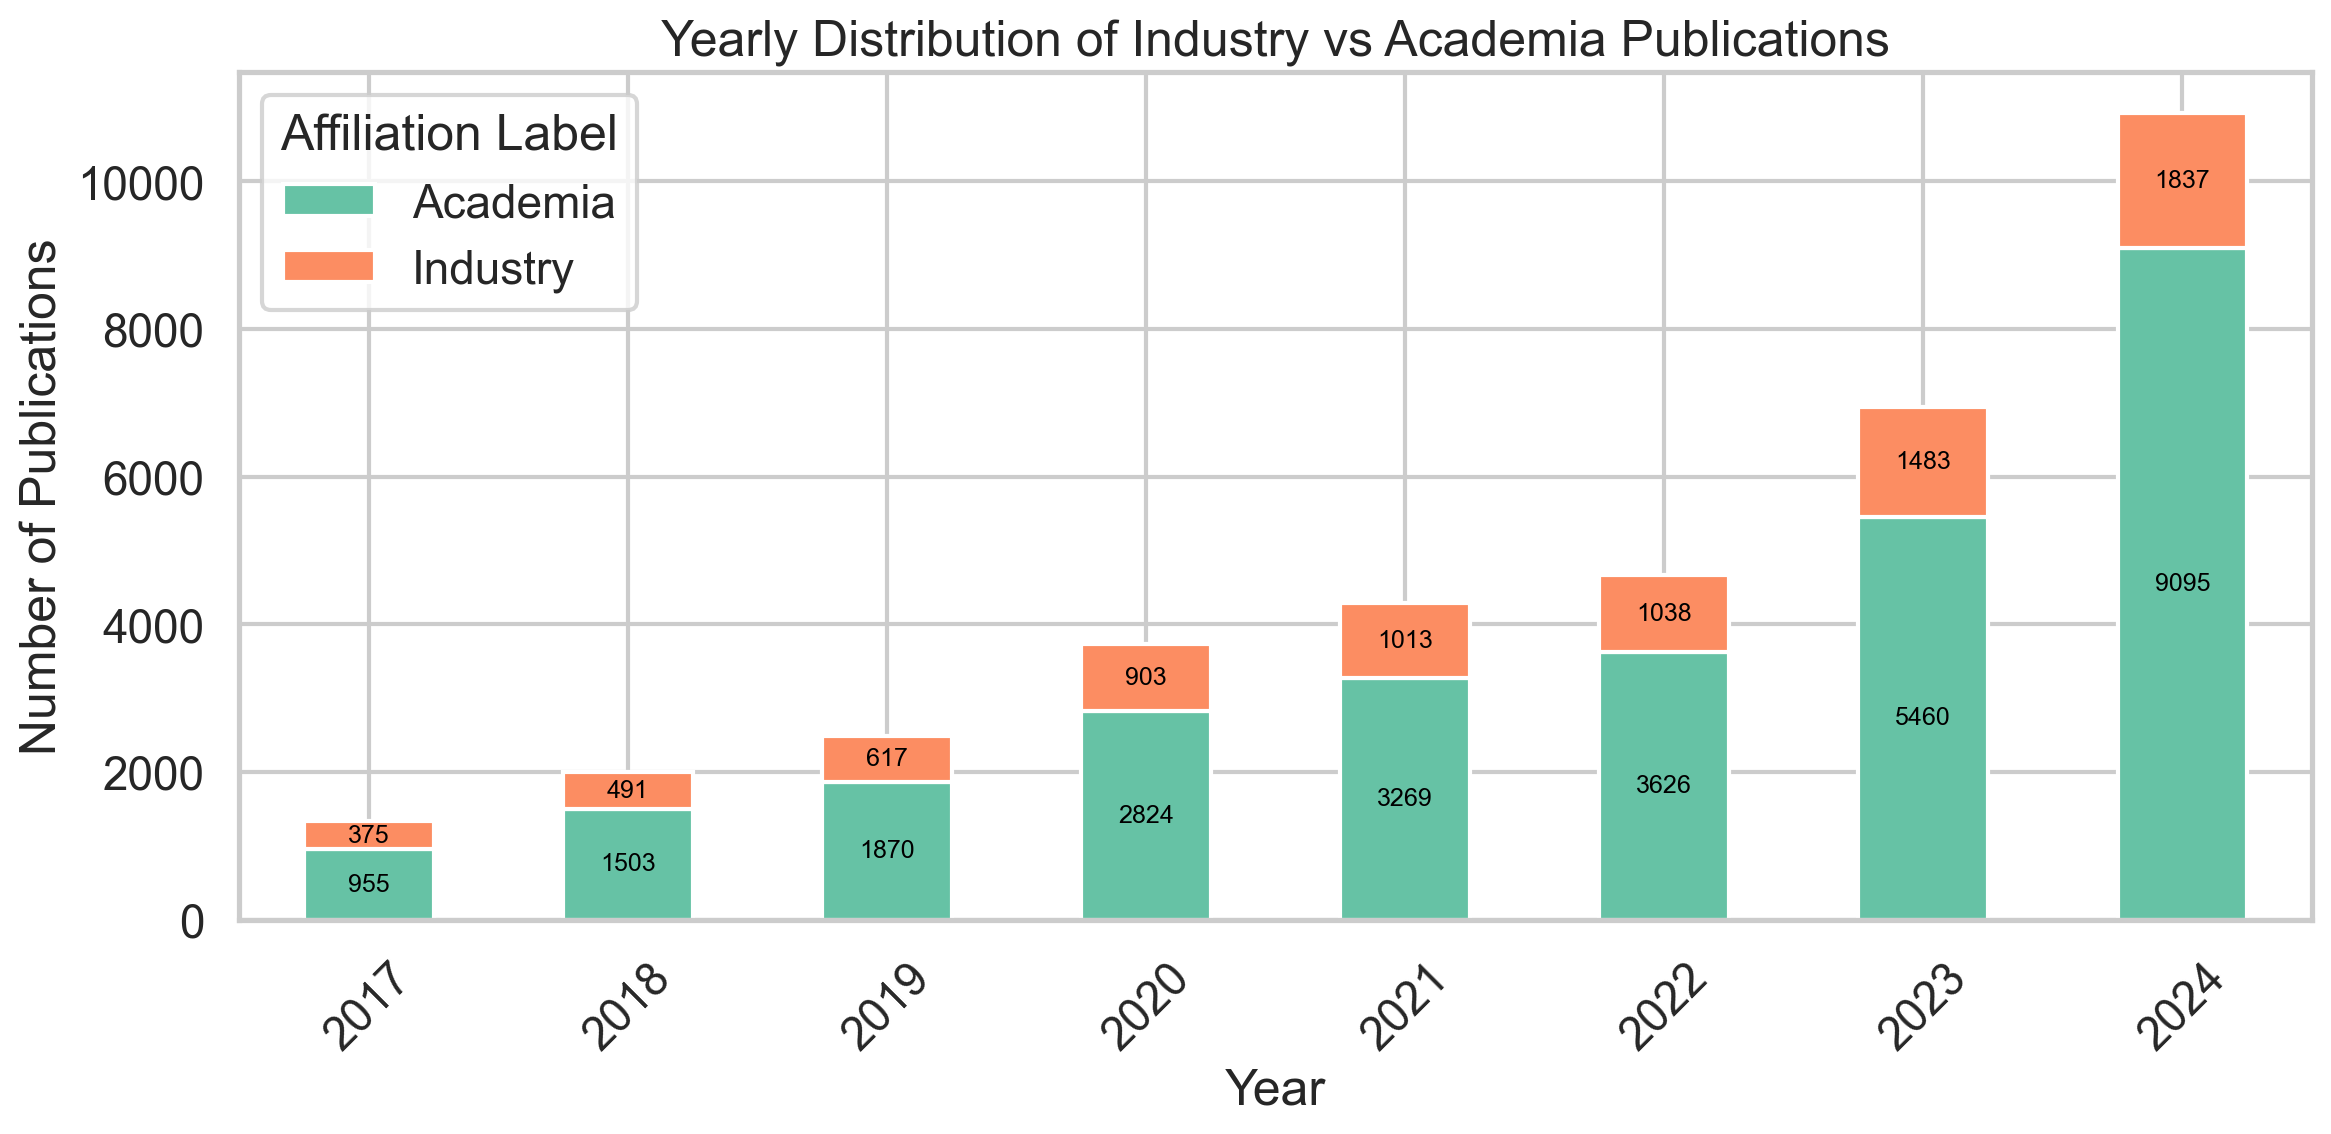

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

ax = yearly_affiliation_counts.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors)
plt.title("Yearly Distribution of Industry vs Academia Publications")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)
plt.legend(title="Affiliation Label")

# Add text labels on top of bars
for idx, year in enumerate(yearly_affiliation_counts.index):
    total = 0
    for affil in yearly_affiliation_counts.columns:
        count = yearly_affiliation_counts.loc[year, affil]
        total += count
        ax.text(idx, total - count / 2, str(int(count)), ha='center', va='center', fontsize=9, color="black")

plt.tight_layout()
plt.show()


In [117]:
yearly_affiliation_counts

Affiliation Label,Academia,Industry
Year,,
2017,955,375
2018,1503,491
2019,1870,617
2020,2824,903
2021,3269,1013
2022,3626,1038
2023,5460,1483
2024,9095,1837


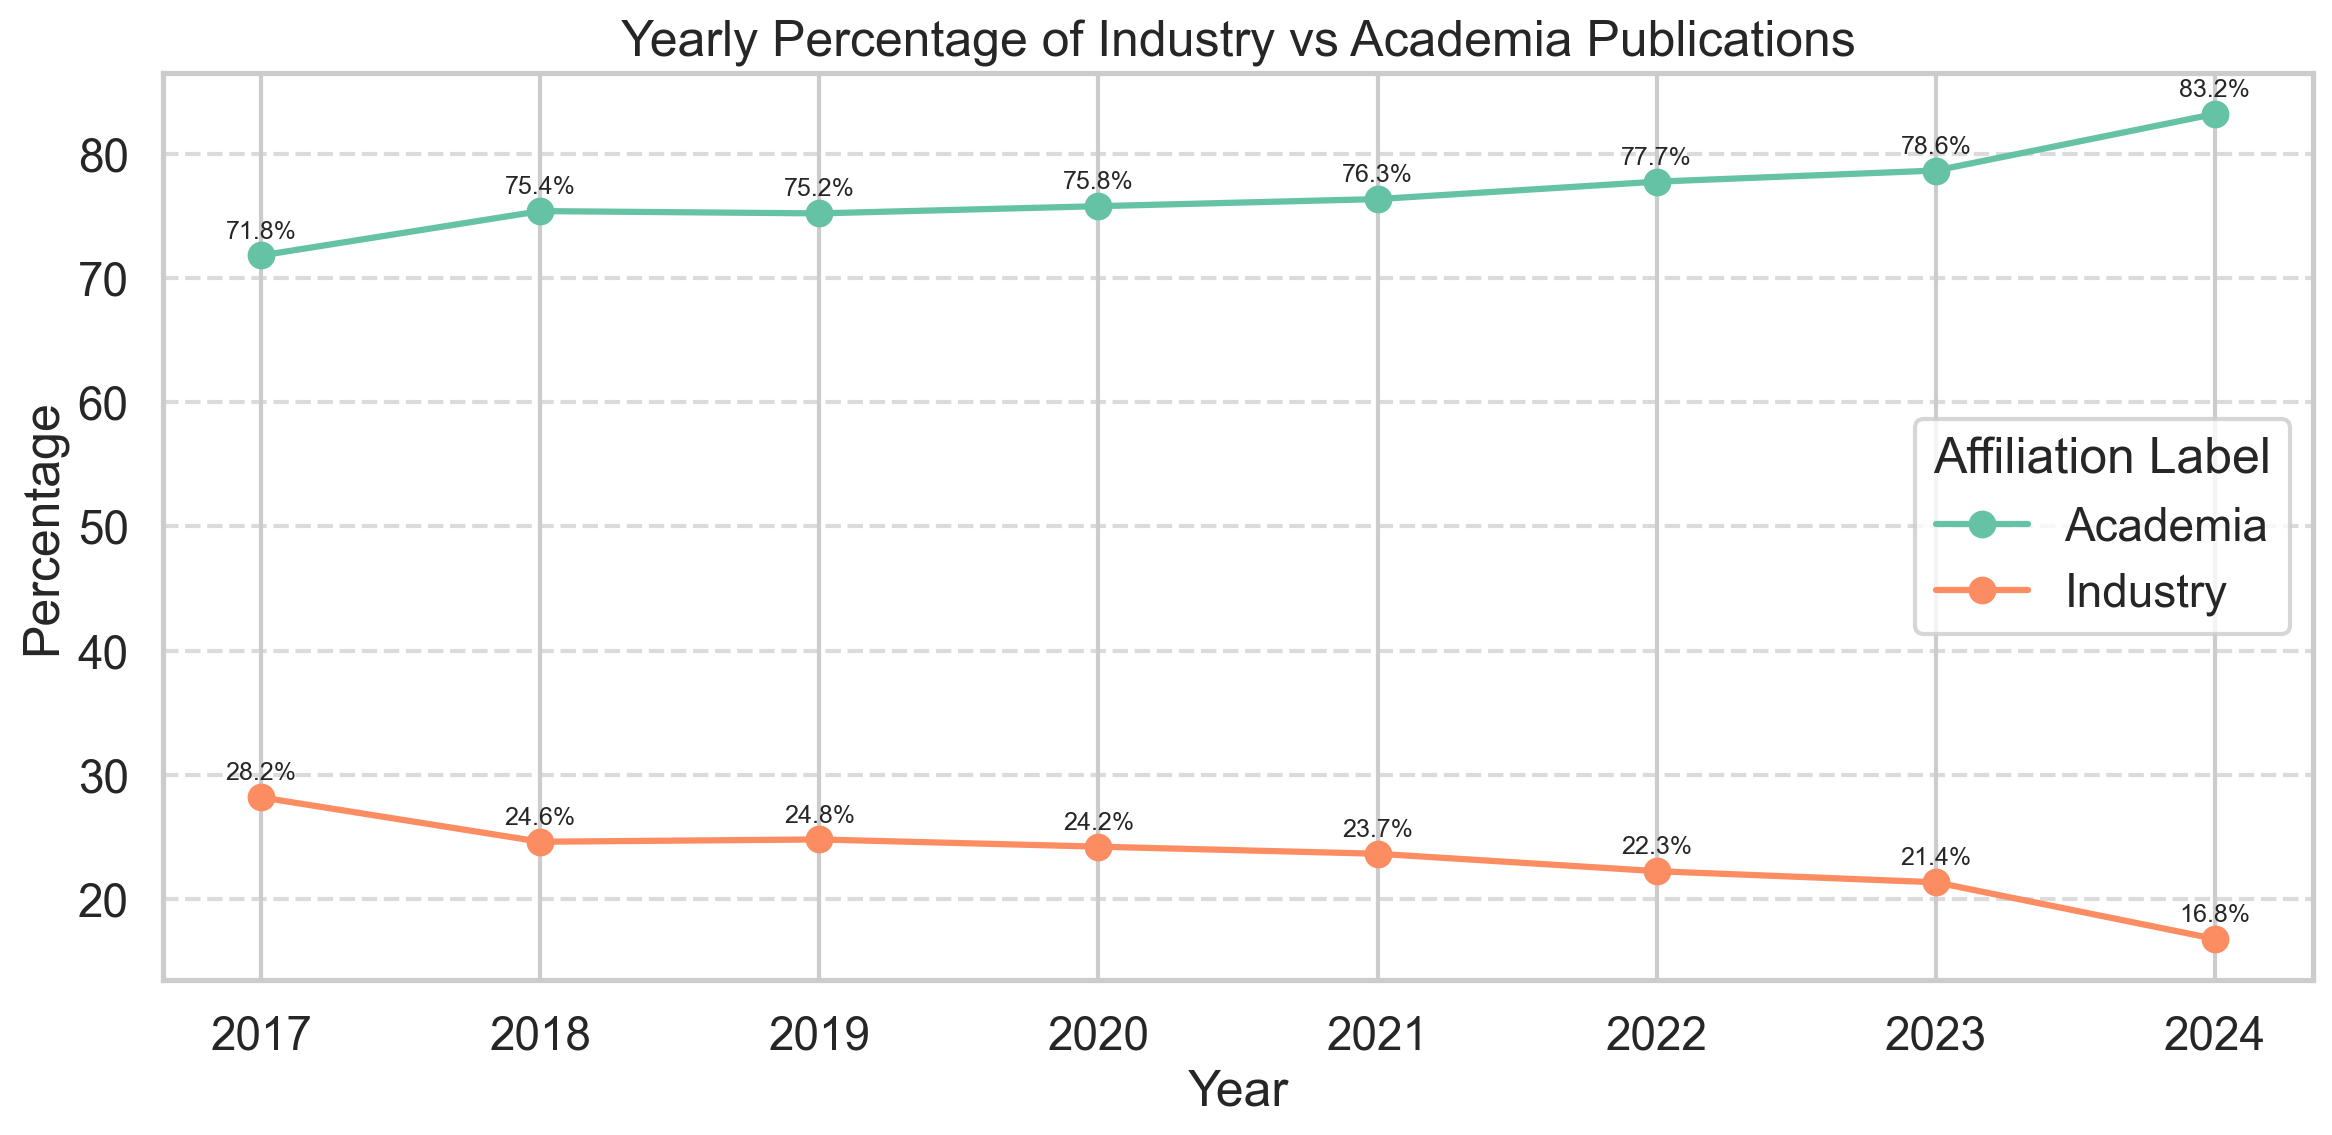

In [ ]:
ax = yearly_affiliation_percentage.plot(kind="line", marker="o", figsize=(12, 6), color=colors)
plt.title("Yearly Percentage of Industry vs Academia Publications")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(title="Affiliation Label")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels to line points
for col in yearly_affiliation_percentage.columns:
    for x, y in zip(yearly_affiliation_percentage.index, yearly_affiliation_percentage[col]):
        ax.text(x, y + 1, f"{y:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [108]:
industry_counts = yearly_affiliation_counts["Industry"]
growth_rate = (industry_counts.iloc[-1] - industry_counts.iloc[0]) / industry_counts.iloc[0] * 100
print(f"Industry publication growth (2017–2024): {growth_rate:.2f}%")

Industry publication growth (2017–2024): 389.87%


In [114]:
threshold_year = (yearly_affiliation_counts["Industry"] >= 0.25 * yearly_affiliation_counts["Academia"]).idxmax()
print(f"Industry publications reached 25% of academia in: {threshold_year}")

Industry publications reached 25% of academia in: 2017


In [115]:
total_counts = icml_updated["Affiliation Label"].value_counts(normalize=True) * 100
print("Overall share (2017–2024):")
print(total_counts)

Overall share (2017–2024):
Affiliation Label
Academia    78.66553
Industry    21.33447
Name: proportion, dtype: float64


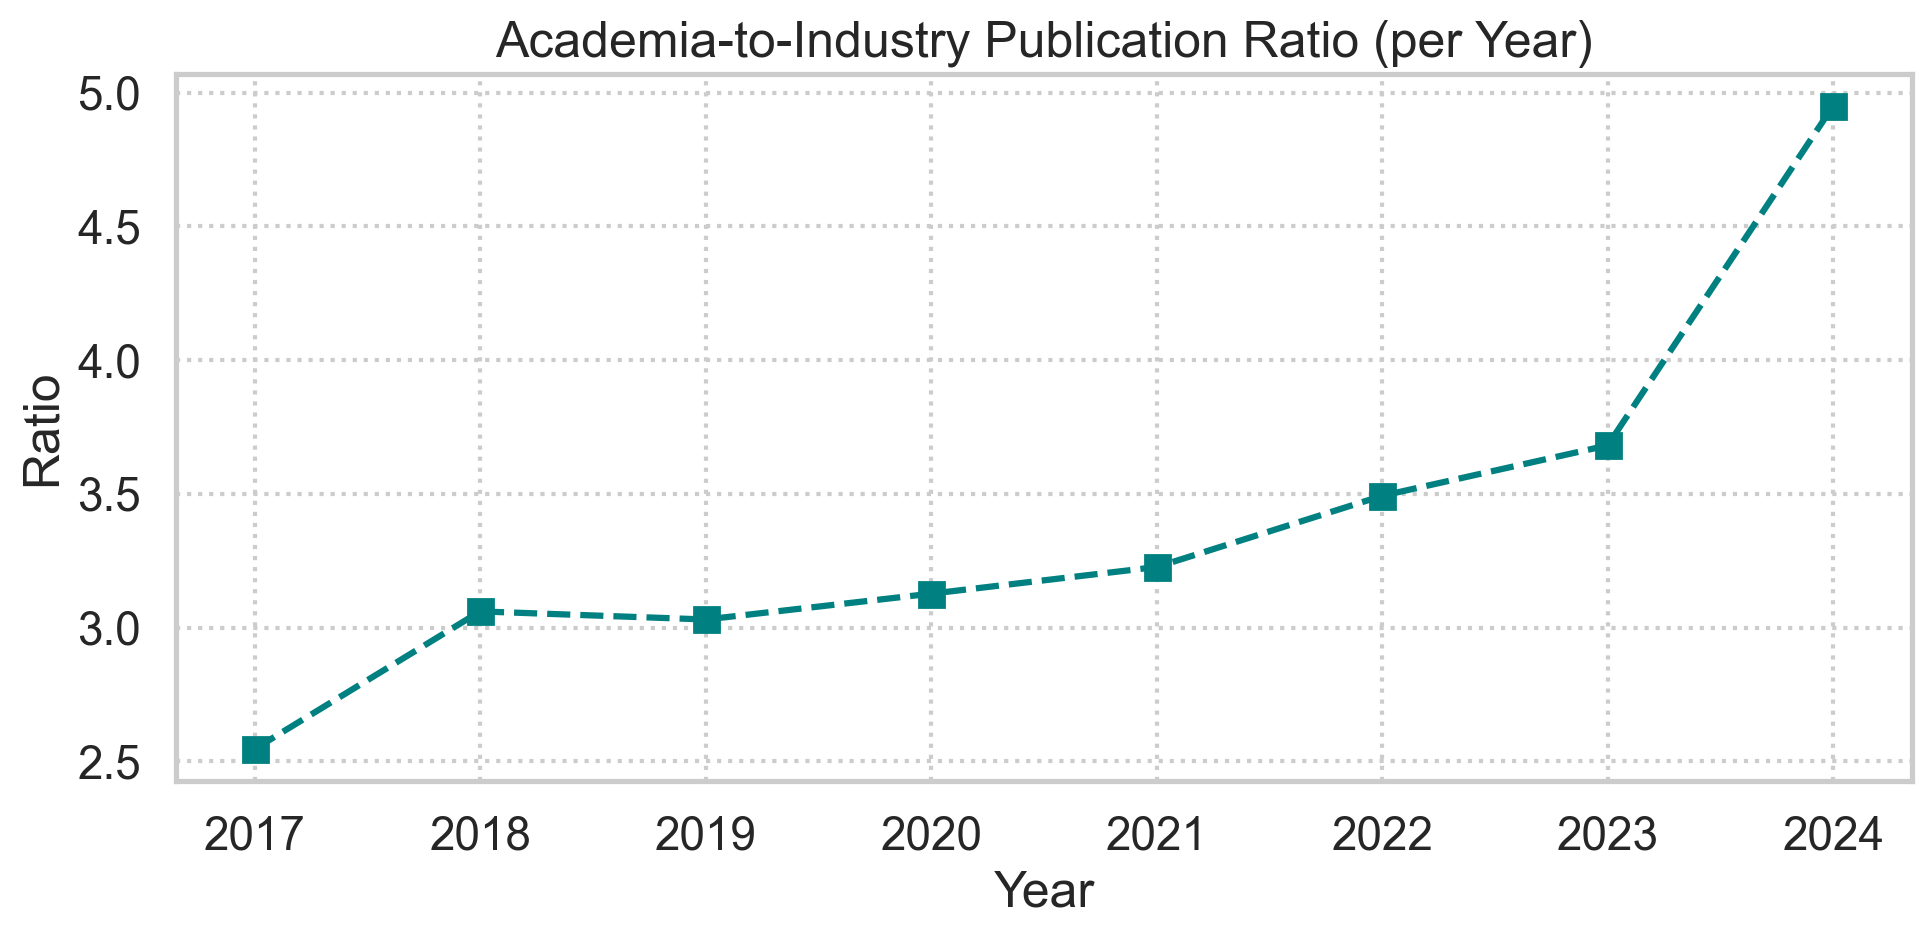

In [118]:
ratio = yearly_affiliation_counts["Academia"] / yearly_affiliation_counts["Industry"]
ratio.plot(marker="s", linestyle="--", figsize=(10, 5), color="teal")
plt.title("Academia-to-Industry Publication Ratio (per Year)")
plt.ylabel("Ratio")
plt.xlabel("Year")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()
